In [1]:
from IPython.display import Image as ImageDisplay

from markovchain import MarkovChain

import matplotlib.pyplot as plt

BASELINE MATRIX 
           Ttukseom  Gunja  Wangsimni  Dapsimni
Ttukseom       0.00   0.28       0.66      0.06
Gunja          0.80   0.00       0.09      0.11
Wangsimni      0.68   0.26       0.00      0.06
Dapsimni       0.42   0.36       0.22      0.00
./markov_chain_base__None.jpeg


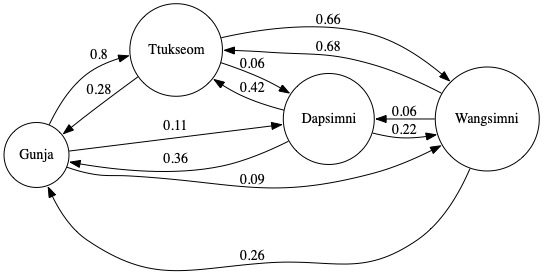

In [2]:
mc = MarkovChain(region_list=['Ttukseom', 'Gunja', 'Wangsimni', 'Dapsimni'],
                 remove_self_flight=True)

base_img = mc.plot_base()
print(base_img)
ImageDisplay(base_img)


 BLOCKED MATRIX BETWEEN Wangsimni AND Gunja
           Ttukseom  Gunja  Wangsimni  Dapsimni
Ttukseom       0.00   0.51       0.06      0.43
Gunja          0.09   0.00       0.00      0.91
Wangsimni      0.60   0.00       0.00      0.40
Dapsimni       0.55   0.02       0.43      0.00


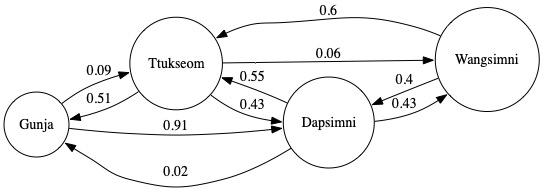

In [3]:
blocked_img = mc.plot_blocked_node(node_1= 'Wangsimni',
                                   node_2='Gunja')
ImageDisplay(blocked_img)

Step: 7
Route:  ['Wangsimni', 'Dapsimni', 'Wangsimni', 'Dapsimni', 'Ttukseom', 'Dapsimni', 'Ttukseom', 'Gunja']


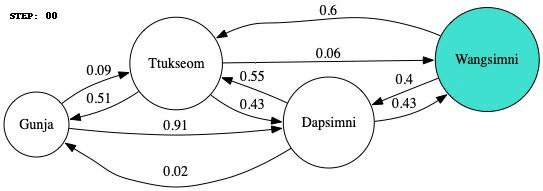

In [4]:
init_region = 'Wangsimni'
dest_region = 'Gunja'
plot_mode = 'blocked'
travel_simulated = mc.travel_simulation(init_region,
                                        dest_region,
                                        plot_mode
                                        )
print(f'Step: {len(travel_simulated)-1}')
print('Route: ',travel_simulated)

travel_img = mc.plot_travel_simulation(plot_mode)
ImageDisplay(travel_img)

# Calculate n-step probability matrix

The UAV is starting the trip from Wangsimni.

What is the probability of ending in Gunja is two trips from now?

In [5]:
mc.prob_ending_region_after_n_step(matrix_df=mc.blocked_df,
                                    init_region='Wangsimni',
                                    final_region='Gunja',
                                    n_step=2)

0.314

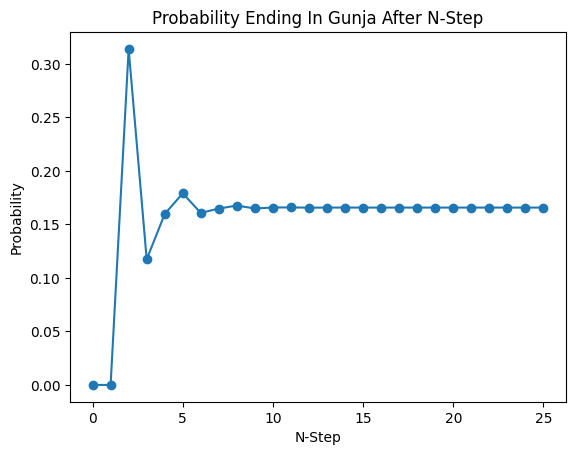

<Figure size 640x480 with 0 Axes>

In [7]:
init_region= 'Wangsimni'
final_region= 'Gunja'
matrix_df= mc.blocked_df
n_step=25
mc.plot_prob_ending(init_region, final_region, matrix_df, n_step)